In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Week1 授業課題3 栗まんじゅう問題
　漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。
[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館
「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。
ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。様々な議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
## 【問題】栗まんじゅうが太陽系を覆う日
　1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

栗まんじゅう が 太陽系 を埋め尽くすまでの時間は 710 分である。


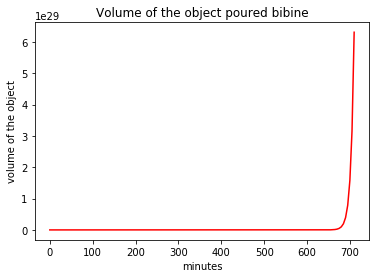

In [32]:
# 球体の体積を求める関数
def sphere_vol(r):
    pi = math.pi
    return (4/3 * pi * r**3) # 体積の計算()

# バイバイン五分ごとに対象物個数が倍増する計算の関数
def bibine(vol1, vol2):
    list_minutes = [0] # バイバインを振りかけた後の経過時間のリスト(5分毎)
    list_count = [1] # バイバインを振りかけた後の対象物の個数のリスト(個)
    list_vol1 = [(vol1[1] * list_count[-1])] # 対象物の体積全体の計算
    #print("{}分後の {} の個数：{}、体積：{:.2f}".format(list_minutes[-1], vol1[0], list_count[-1], list_vol1[-1]))
    
    while list_vol1[-1] < vol2[1]:
        list_minutes.append(list_minutes[-1] + 5)
        list_count.append(list_count[-1] * 2)
        list_vol1.append(list_vol1[-1] * 2)
        #print("{}分後の {} の個数：{}、体積：{:.2f}".format(list_minutes[-1], vol1[0], list_count[-1], list_vol1[-1]))
    return list_minutes, list_vol1


DISTANCE_NEPTUNE = 4500000000 # 太陽から海王星までの距離(km)
VOL_TOKYODOME = 0.00124 # 東京ドームの体積(0.00124立法キロメートル)
VOL_EARTH = 183319780000 # 地球の体積(立法キロメートル)

kurimanju = ["栗まんじゅう", sphere_vol(3 / 100000)] # 栗まんじゅうの形状はデフォルメして半径3cmの球体と考え体積を求める(km)
solar_system = ["太陽系", sphere_vol(DISTANCE_NEPTUNE)] # 太陽系の周縁部は太陽から最も遠い惑星(海王星)までの距離とする

tokyodome = ["東京ドーム", VOL_TOKYODOME] 
earth = ["地球", VOL_EARTH]

vol1 = kurimanju
vol2 = solar_system

list_minutes, list_vol1 = bibine(vol1, vol2)
print("{} が {} を埋め尽くすまでの時間は {} 分である。".format(vol1[0], vol2[0], list_minutes[-1]))

plt.title("Volume of the object poured bibine")
plt.xlabel("minutes")
plt.ylabel("volume of the object")
plt.plot(list_minutes,list_vol1, color="r", label="amount of grains of the day")
plt.show()


